In [118]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [119]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,silhouette_score,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.cluster import KMeans

In [120]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-4-heart.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [121]:
mis_data = data.isna().sum() * 100/len(data)

mis_data.sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [122]:
data.duplicated().sum()

data.drop_duplicates(ignore_index=False, keep='first', subset=None, inplace=True)

data.duplicated().sum()

0

In [123]:
num_val = ['age','trestbps','chol','thalach','oldpeak']
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [124]:
y = data.target 
x = data.drop(columns=['target'])

In [125]:
colm_trans = ColumnTransformer( 
    [ 
        ('num', StandardScaler(), num_val),
        ('cat', OrdinalEncoder(), cat_val)
    ]
)

In [126]:
x = pd.DataFrame(colm_trans.fit_transform(x))

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [128]:
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

y_true = y_test 
y_pred = logreg.predict(x_test)

scr_accu = accuracy_score(y_true,y_pred).round(3)
scr_accu

0.824

In [129]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
y_true = y_test

accu_scr = accuracy_score(y_test,y_pred).round(3)
accu_scr

0.802

<AxesSubplot:xlabel='Predicted Values', ylabel='True Values'>

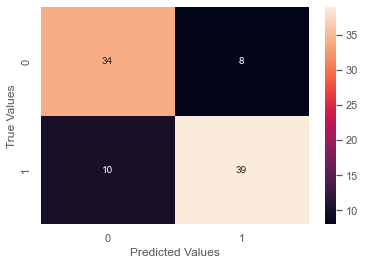

In [130]:
conma_dic = { 
    'y_true':y_true,
    'y_pred':y_pred
}

conma_cols = pd.DataFrame( 
    conma_dic, columns=['y_true','y_pred']
)

confusion_matrix = pd.crosstab(conma_cols['y_true'], conma_cols['y_pred'], rownames=['True Values'], colnames=['Predicted Values'])

sns.heatmap(confusion_matrix,annot=True)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted Values', ylabel='True Values'>

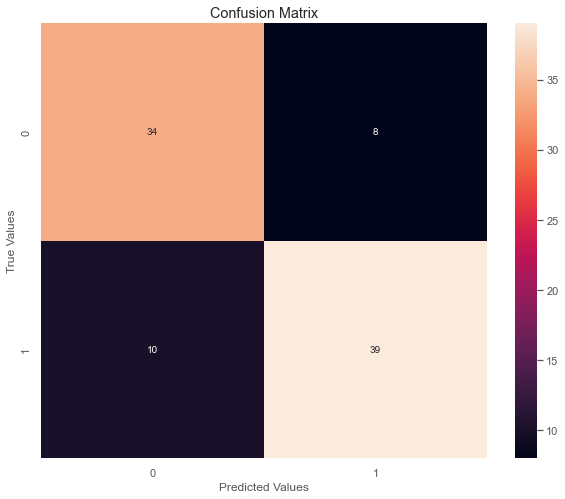

In [131]:
conma_dics = { 
    'y_true':y_true,
    'y_pred':y_pred
}

conma_col = pd.DataFrame( 
    conma_dics, columns=['y_true','y_pred']
)

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Confusion Matrix')

confusion_matrix = pd.crosstab(conma_col['y_true'], conma_col['y_pred'], rownames=['True Values'], colnames=['Predicted Values'])

sns.heatmap(confusion_matrix,annot=True)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Line Plot Accuracy Test'}>

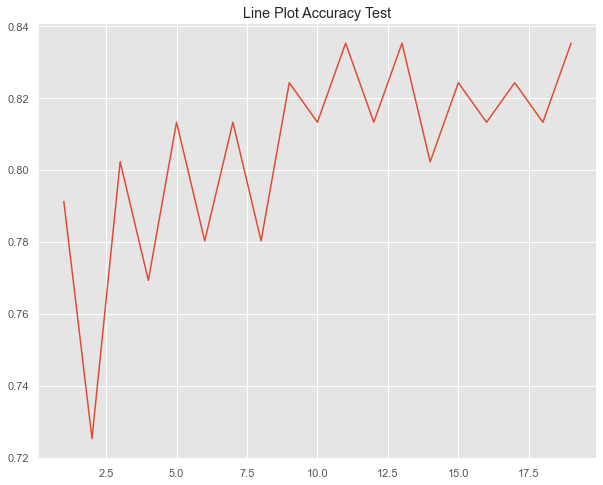

In [132]:
accuracies = []

for N in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=N)

    knn.fit(x_train,y_train)

    y_true = y_test 
    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_true,y_pred)

    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Line Plot Accuracy Test')

sns.lineplot(np.arange(1,20),accuracies)

In [133]:
best_k = 1+ np.argmax(accuracies)
best_k

11

In [134]:
best_accu = np.max(accuracies)
best_accu

0.8351648351648352